### Student Performance Indicator

##### Lifecycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem Statement

- This project helps to understand how the student's performance (test_scores) is affected by other variables such as Gender, Ethnicity, Parental level of Education, Lunch and Test preparation course

### 2) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 1000 rows and 8 columns

### 2.1) import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Import the CSV data as Pandas DataFrame

In [2]:
df = pd.read_csv("data/stud.csv")

### Show top 5 records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset Information

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to Perform

- Check Missing values
- Check Duplicates
- Check Data type
- Check the number of unique values of each column
- Check statistics of dataset
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There are no missing values**

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

**There are no duplicate values**

### 3.3 Check Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check Statistics of data

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insights**
- So in numerical column the mean are close to each other
- So in numerical column standard deviation are close to each other
- Minimum value is 0 for math_score and for reading and writing it is not zero 

### 3.6 Exploring Data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
for i in df.columns[:-3]:
    print()
    print(f"{i}:{df[i].unique()}")


gender:['female' 'male']

race_ethnicity:['group B' 'group C' 'group A' 'group D' 'group E']

parental_level_of_education:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch:['standard' 'free/reduced']

test_preparation_course:['none' 'completed']


In [12]:
df.select_dtypes(exclude="object")

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [13]:
df.select_dtypes(include="object")

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [14]:
numerical_features = df.select_dtypes(exclude="object")
categorical_features = df.select_dtypes(exclude="object")

### 3.7 Feature Engineering

In [15]:
df["total_score"] = df["math_score"] + df["writing_score"] + df["reading_score"]
df["average"] = df["total_score"]/3

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
df[df["reading_score"] == 100]["reading_score"].count()

17

In [18]:
df[df["writing_score"] == 100]["writing_score"].count()

14

In [19]:
df[df["math_score"] == 100]["math_score"].count()

7

In [20]:
print("Number of people who have got full in reading:",df[df["reading_score"] == 100]["reading_score"].count())
print("Number of people who have got full in maths:",df[df["math_score"] == 100]["math_score"].count())
print("Number of people who have got full in writing:",df[df["writing_score"] == 100]["writing_score"].count())

Number of people who have got full in reading: 17
Number of people who have got full in maths: 7
Number of people who have got full in writing: 14


In [21]:
df[df["reading_score"] <= 20]["reading_score"].count()

1

In [22]:
df[df["writing_score"] <= 20]["writing_score"].count()

3

In [23]:
df[df["reading_score"] <= 20]["reading_score"].count()

1

In [24]:
print("Number of people who have got less than 20 in reading:",df[df["reading_score"] <=20 ]["reading_score"].count())
print("Number of people who have got less than 20 in maths:",df[df["math_score"] <=20]["math_score"].count())
print("Number of people who have got less than 20 in writing:",df[df["writing_score"] <=20]["writing_score"].count())

Number of people who have got less than 20 in reading: 1
Number of people who have got less than 20 in maths: 4
Number of people who have got less than 20 in writing: 3


**Insights**
- Students have performed worst in maths
- best performance in reading section

### 4. Exploring Data (Visualization)

##### 4.1 Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

<AxesSubplot:xlabel='average', ylabel='Count'>

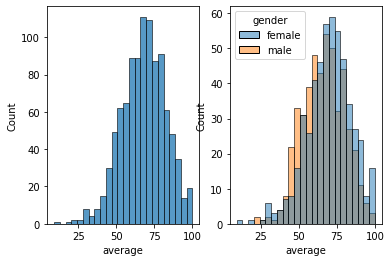

In [25]:
plt.subplot(121)
sns.histplot(x="average",data=df)
plt.subplot(122)
sns.histplot(x="average",data=df,hue="gender")

**Insights**

females have much higher average marks as compared to male

<AxesSubplot:xlabel='total_score', ylabel='Count'>

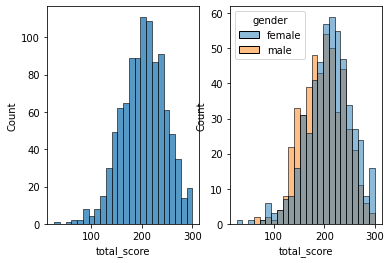

In [26]:
plt.subplot(121)
sns.histplot(x="total_score",data=df)
plt.subplot(122)
sns.histplot(x="total_score",data=df,hue="gender")

**Insights**

females have much higher total marks as compared to male

<AxesSubplot:xlabel='average', ylabel='Count'>

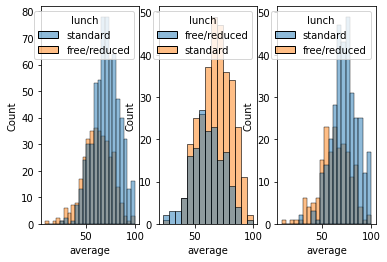

In [27]:
plt.figsize=(16,9)
plt.subplot(131)
sns.histplot(data=df,x="average",hue="lunch")
plt.subplot(132)
sns.histplot(data=df[df["gender"]=="male"],x="average",hue="lunch")
plt.subplot(133)
sns.histplot(data=df[df["gender"]=="female"],x="average",hue="lunch")

**Insights**

- Standard lunch helps in performing better in exams
- Standard lunch helps in exams irrespective of gender

<AxesSubplot:xlabel='average', ylabel='Count'>

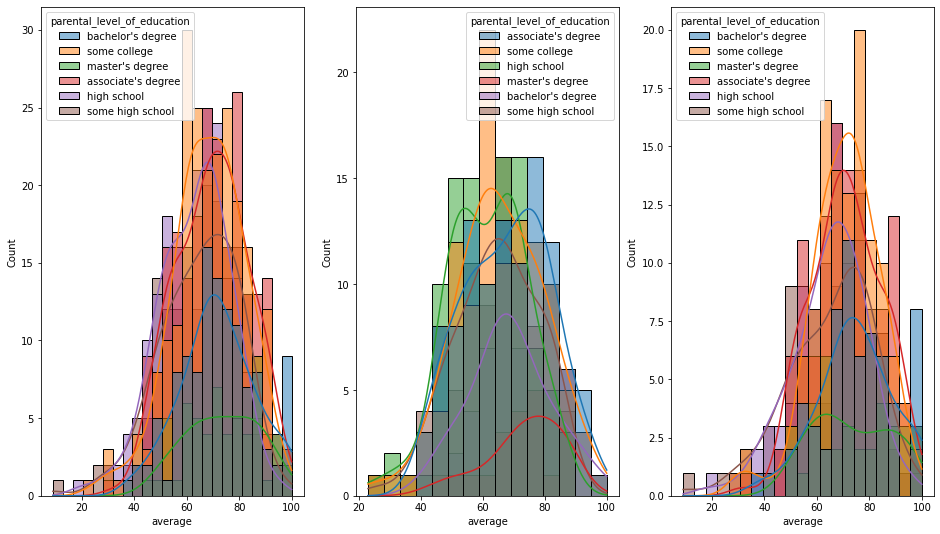

In [28]:
plt.subplots(1,3,figsize=(16,9))
plt.subplot(131)
sns.histplot(data=df,x="average",hue="parental_level_of_education",kde=True)
plt.subplot(132)
sns.histplot(data=df[df["gender"]=="male"],x="average",hue="parental_level_of_education",kde=True)
plt.subplot(133)
sns.histplot(data=df[df["gender"]=="female"],x="average",hue="parental_level_of_education",kde=True)

**Insights**

- In general parent's education don't help student perform well in exam.
- 2nd plot the parents who have associate degree their male child to perform well in exam
- 3rd plot there is no effect of parent's education on female students.

<AxesSubplot:xlabel='average', ylabel='Count'>

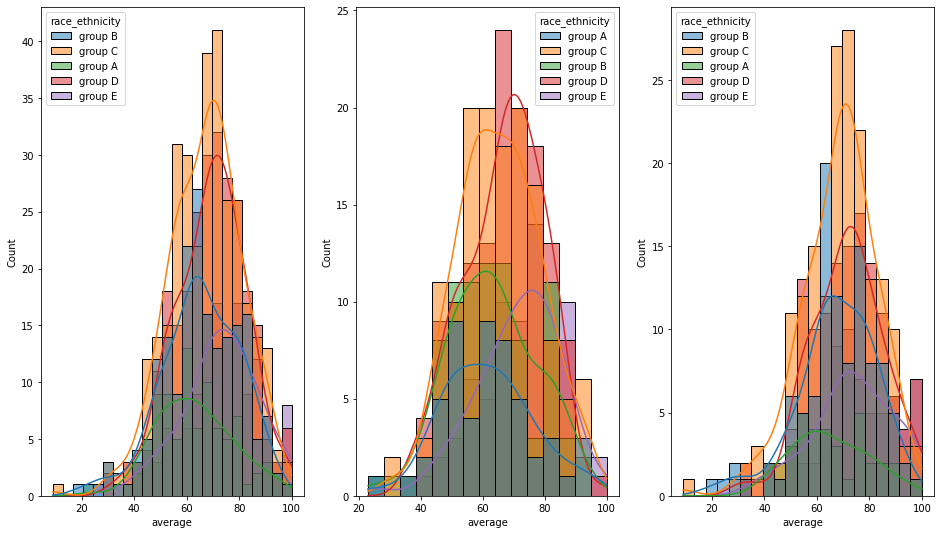

In [29]:
plt.subplots(1,3,figsize=(16,9))
plt.subplot(131)
sns.histplot(data=df,x="average",hue="race_ethnicity",kde=True)
plt.subplot(132)
sns.histplot(data=df[df["gender"]=="male"],x="average",hue="race_ethnicity",kde=True)
plt.subplot(133)
sns.histplot(data=df[df["gender"]=="female"],x="average",hue="race_ethnicity",kde=True)

**Insights**

- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female


### 4.2 Maximum score of students in all three subjects

<AxesSubplot:ylabel='writing_score'>

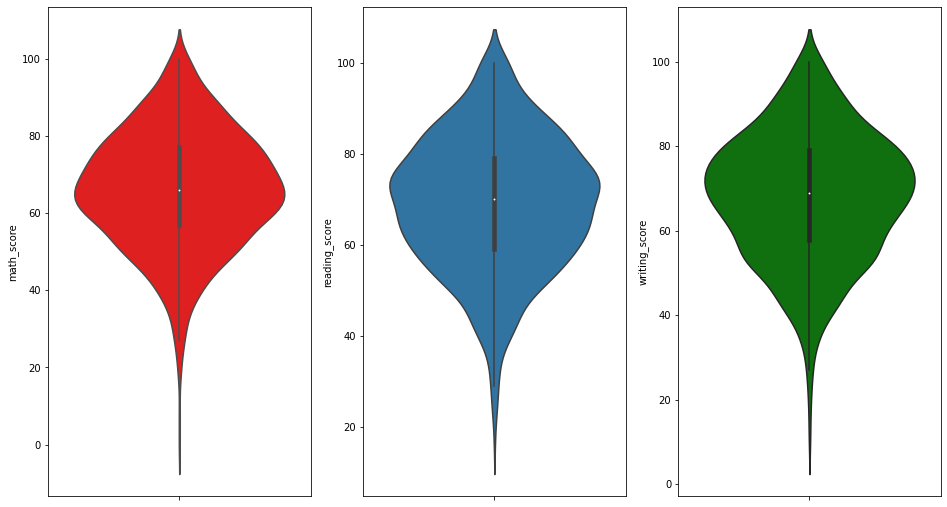

In [30]:
plt.subplots(1,3,figsize=(16,9))
plt.subplot(131)
sns.violinplot(y="math_score",data=df,color="red")
plt.subplot(132)
sns.violinplot(y="reading_score",data=df)
plt.subplot(133)
sns.violinplot(y="writing_score",data=df,color="green")

**Insights**

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.3 Multivariate analysis using pieplot

<AxesSubplot:ylabel='test_preparation_course'>

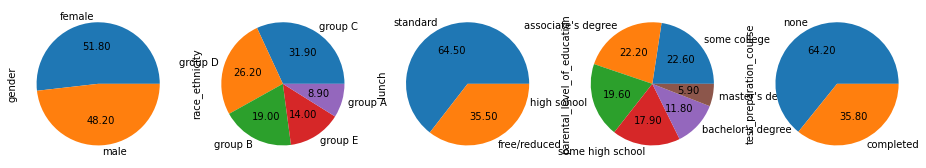

In [31]:
plt.subplots(1,5,figsize=(16,9))
plt.subplot(1,5,1)
df["gender"].value_counts().plot(kind="pie",autopct="%.2f")
plt.subplot(1,5,2)
df["race_ethnicity"].value_counts().plot(kind="pie",autopct="%.2f")
plt.subplot(1,5,3)
df["lunch"].value_counts().plot(kind="pie",autopct="%.2f")
plt.subplot(1,5,4)
df["parental_level_of_education"].value_counts().plot(kind="pie",autopct="%.2f")
plt.subplot(1,5,5)
df["test_preparation_course"].value_counts().plot(kind="pie",autopct="%.2f")

**Insights**

- Number of males and females are almost same
- Number of students in Group C are more
- Number of students have chosen standard lunch
- Number of students have not enrolled for test preparation course
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature Wise Visualization

#### 4.4.1 Gender Column 

- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

<AxesSubplot:xlabel='gender', ylabel='count'>

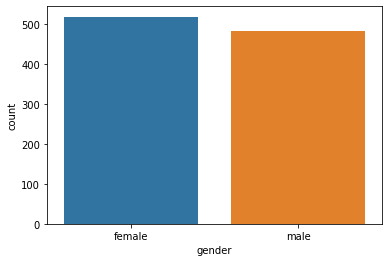

In [32]:
sns.countplot(x="gender",data=df)

<AxesSubplot:ylabel='gender'>

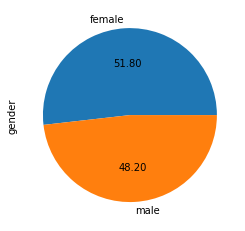

In [33]:
df["gender"].value_counts().plot(kind="pie",autopct="%.2f")

**Insights**

- Male and female are almost same in number


### Bivariate Analysis ( Is gender has any impact on student's performance ? )

<AxesSubplot:xlabel='gender', ylabel='average'>

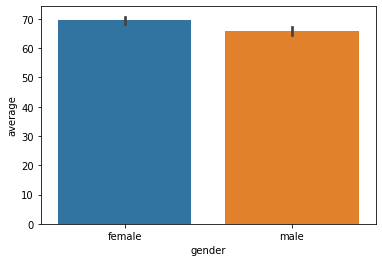

In [34]:
sns.barplot(x="gender",y="average",data=df)

**Insights**

- Female have much better average score

### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

### Univariate Analysis ( How is Group wise distribution ?)

<AxesSubplot:xlabel='race_ethnicity', ylabel='count'>

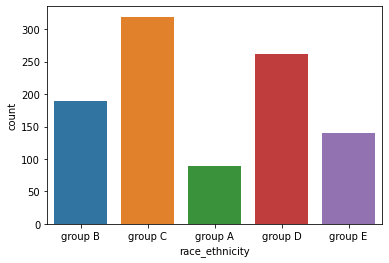

In [35]:
sns.countplot(x="race_ethnicity",data=df)

<AxesSubplot:ylabel='race_ethnicity'>

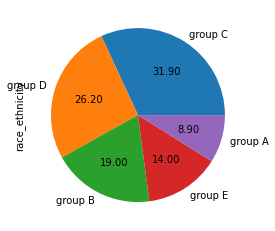

In [36]:
df["race_ethnicity"].value_counts().plot(kind="pie",autopct="%.2f")

**Insights**

- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA

### Bivariate Analysis ( Is Race/Ehnicity has any impact on student's performance ? )

<AxesSubplot:xlabel='race_ethnicity', ylabel='writing_score'>

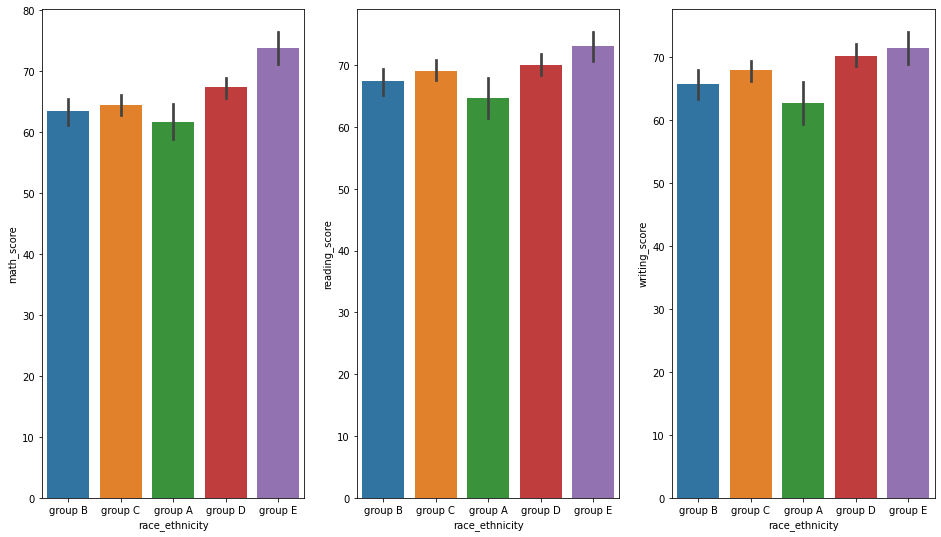

In [37]:
plt.subplots(1,3,figsize=(16,9))
plt.subplot(131)
sns.barplot(x="race_ethnicity",y="math_score",data=df)
plt.subplot(132)
sns.barplot(x="race_ethnicity",y="reading_score",data=df)
plt.subplot(133)
sns.barplot(x="race_ethnicity",y="writing_score",data=df)

**Insights**

- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

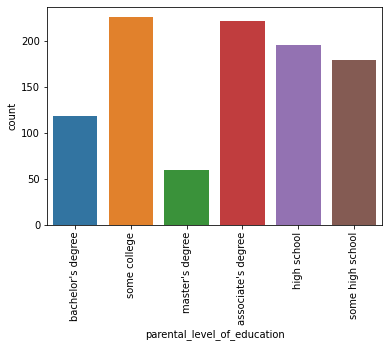

In [38]:
sns.countplot(x="parental_level_of_education",data=df)
plt.xticks(rotation=90)

<AxesSubplot:ylabel='parental_level_of_education'>

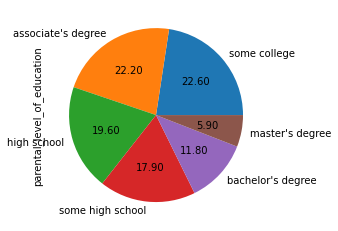

In [39]:
df["parental_level_of_education"].value_counts().plot(kind="pie",autopct="%.2f")

**Insights**

- Largest number of parents are from some college.

### Bivariate Analysis ( Is parental education has any impact on student's performance ? )

<AxesSubplot:ylabel='parental_level_of_education'>

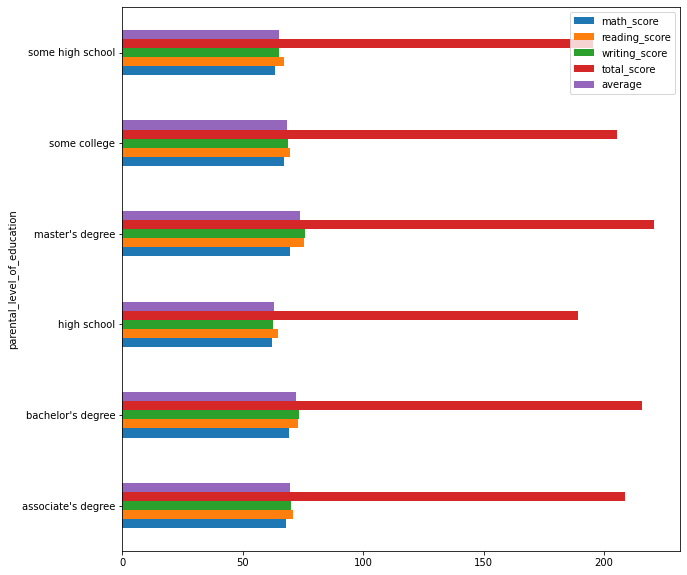

In [40]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))

**Insights**

The score of student whose parents possess master and bachelor level education are higher than others.

### 4.4.4 LUNCH COLUMN
- Which type of lunch is most common among students ?
- What is the effect of lunch type on test results?

<AxesSubplot:xlabel='lunch', ylabel='count'>

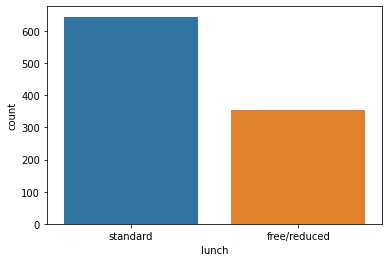

In [41]:
sns.countplot(x="lunch",data=df)

<AxesSubplot:ylabel='lunch'>

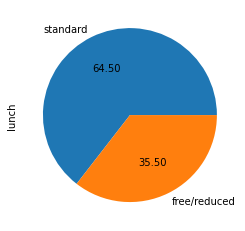

In [42]:
df["lunch"].value_counts().plot(kind="pie",autopct="%.2f")

**Insights**
- Students being served Standard lunch was more than free lunch

### Bivariate Analysis ( Is lunch type intake has any impact on student's performance ? )

<AxesSubplot:xlabel='lunch', ylabel='average'>

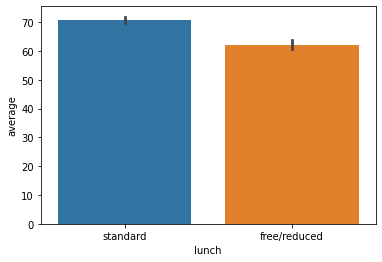

In [43]:
sns.barplot(x="lunch",y="average",data=df)

**Insights**

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

### 4.4.5 TEST PREPARATION COURSE COLUMN
- Are students taking test preparation course ?
- Is Test prepration course has any impact on student's performance ?

<AxesSubplot:xlabel='test_preparation_course', ylabel='count'>

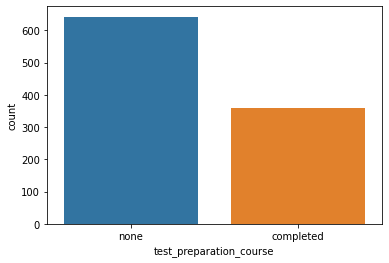

In [44]:
sns.countplot(x="test_preparation_course",data=df)

<AxesSubplot:ylabel='test_preparation_course'>

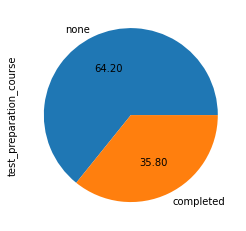

In [45]:
df["test_preparation_course"].value_counts().plot(kind="pie",autopct="%.2f")

**Insights**

Students are not taking the test preparation course

### Bivariate Analysis ( Is Test prepration course has any impact on student's performance ? )

<AxesSubplot:xlabel='test_preparation_course', ylabel='average'>

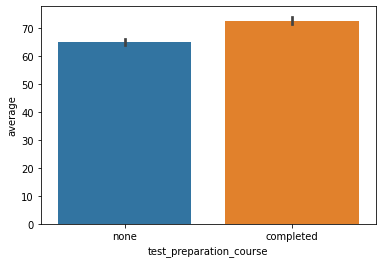

In [46]:
sns.barplot(x="test_preparation_course",y="average",data=df)

**Insights**

Average score is higher for those students who have completed test preparation course

### 4.4.6 Checking Outliers

<AxesSubplot:xlabel='average'>

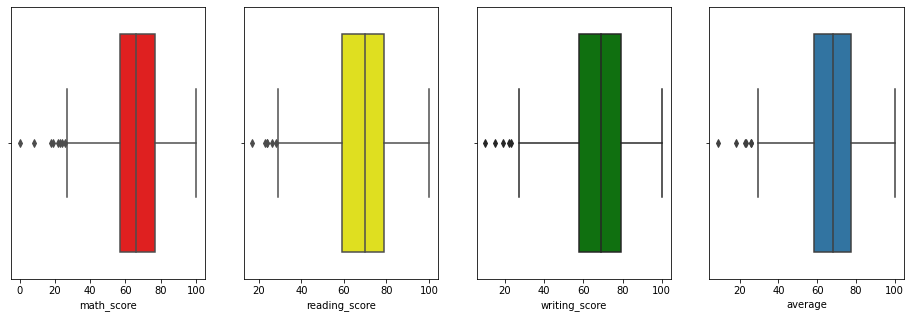

In [47]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(x="math_score",data=df,color="red")
plt.subplot(142)
sns.boxplot(x="reading_score",data=df,color="yellow")
plt.subplot(143)
sns.boxplot(x="writing_score",data=df,color="green")
plt.subplot(144)
sns.boxplot(x="average",data=df)

### 4.4.7 Multivariate Analysis Using Pairplot

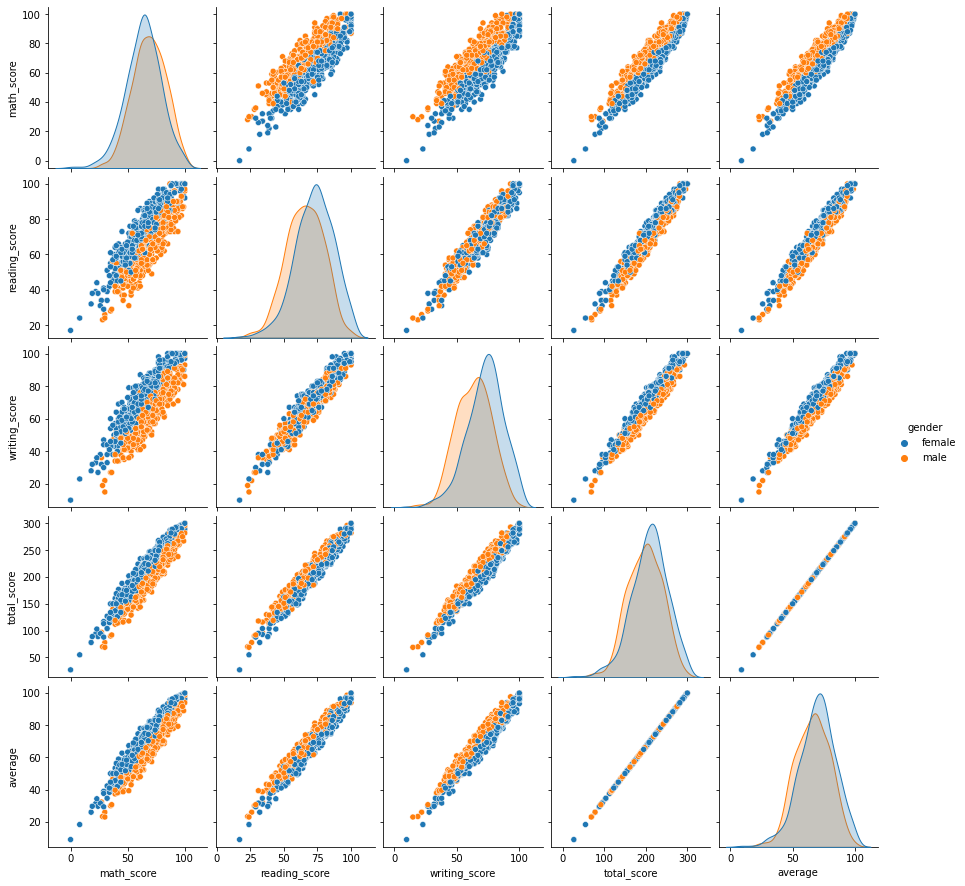

In [48]:
sns.pairplot(df,hue="gender")

**Insights**

From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is related with test preparation course
- Finishing preparation course is benefitial.
- Less student take test preparation course
- Most iof student take standard lunch